In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
file = '../data/NASA Near-Earth Objects-CleanbyThang.csv'
df = pd.read_csv(file,index_col=0)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23999 entries, 2001981 to 54073367
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   absolute_magnitude_h               23999 non-null  float64
 1   is_potentially_hazardous_asteroid  23999 non-null  bool   
 2   is_sentry_object                   23999 non-null  bool   
 3   kilometers_estimated_diameter_min  23999 non-null  float64
 4   kilometers_estimated_diameter_max  23999 non-null  float64
 5   orbit_class_type                   23999 non-null  object 
 6   perihelion_distance                23999 non-null  float64
 7   aphelion_distance                  23999 non-null  float64
 8   first_observation_date             23999 non-null  object 
 9   last_observation_date              23999 non-null  object 
 10  orbit_class_description            23999 non-null  object 
dtypes: bool(2), float64(5), object(4)
memory usage: 1.

In [5]:
df['first_observation_date'] = pd.to_datetime(df['first_observation_date'])
df['last_observation_date'] = pd.to_datetime(df['last_observation_date'])



In [6]:
df= df.drop(columns=['orbit_class_description'])

In [7]:
# đánh giá ma trận tương quan

category_col = ['orbit_class_range','is_sentry_object']
numeric_col = ['absolute_magnitude_h','kilometers_estimated_diameter_min','kilometers_estimated_diameter_max','perihelion_distance','aphelion_distance','first_observation_date','last_observation_date']
target_col = 'is_potentially_hazardous_asteroid'


In [8]:
# để đánh giá tương quan một biến dàng nhị phân và các biến liên tục ta dùng Point Biserial Correlation
from scipy.stats import pointbiserialr
corr_numeric = []
for col in numeric_col:
    if df[col].dtype == 'datetime64[ns]':
        df[col] = df[col].dt.year
    corr = pointbiserialr(df[target_col],df[col])
    corr_numeric.append([col,corr[0],corr[1]])
    
for res in corr_numeric:
    if res[2] < 0.05:
        print(f"{res[0]}: {res[1]}")
    else:
        print(f"{res[0]}: {res[1]} - Không có tương quan")
        
    

absolute_magnitude_h: -0.29817214696194916
kilometers_estimated_diameter_min: 0.17505221765601386
kilometers_estimated_diameter_max: 0.17505221765617768
perihelion_distance: -0.2064188018674699
aphelion_distance: 0.009944115108585082 - Không có tương quan
first_observation_date: -0.19954572121037456
last_observation_date: 0.10059930349653132


In [9]:
unique_aphelion_distance_count = df['aphelion_distance'].nunique()
print(f"Số giá trị khác nhau của cột aphelion_distance: {unique_aphelion_distance_count}")

Số giá trị khác nhau của cột aphelion_distance: 23999


In [10]:
df['aphelion_distance'].describe()
df['perihelion_distance'].value_counts()

perihelion_distance
0.928007    1
0.621512    1
1.238537    1
1.050403    1
0.790185    1
           ..
0.483909    1
1.016900    1
0.447827    1
1.042732    1
1.055496    1
Name: count, Length: 23999, dtype: int64

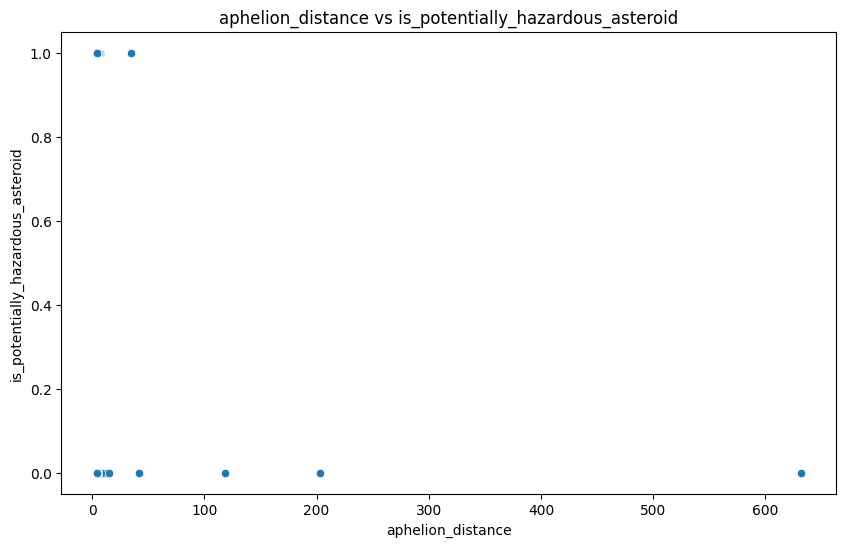

In [12]:
newdf = df[df['aphelion_distance'] > 4 ]
# biểu diễn aphelion_distance để giải thích tại sao không có tương quan
plt.figure(figsize=(10,6))
sns.scatterplot(x='aphelion_distance',y='is_potentially_hazardous_asteroid',data=newdf)
plt.title('aphelion_distance vs is_potentially_hazardous_asteroid')
plt.xlabel('aphelion_distance')
plt.ylabel('is_potentially_hazardous_asteroid')
plt.show()


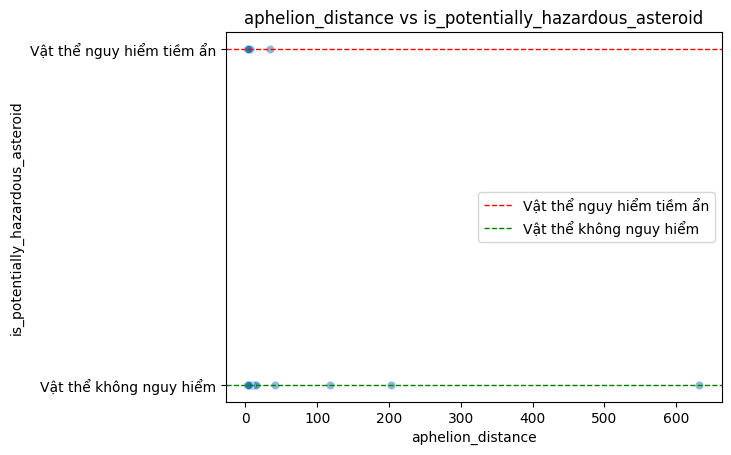

In [19]:
# Create scatter plot
sns.scatterplot(x='aphelion_distance', 
                y='is_potentially_hazardous_asteroid',
                data=newdf,
                alpha=0.5)

# Add horizontal lines for True/False values
plt.axhline(y=1, color='r', linestyle='--', label='Vật thể nguy hiểm tiềm ẩn', linewidth=1)
plt.axhline(y=0, color='g', linestyle='--', label='Vật thể không nguy hiểm', linewidth=1)

# Customize plot
plt.title('aphelion_distance vs is_potentially_hazardous_asteroid')
plt.xlabel('aphelion_distance')
plt.ylabel('is_potentially_hazardous_asteroid')

# Hide y-axis ticks but keep the label
plt.yticks([0, 1], ['Vật thể không nguy hiểm', 'Vật thể nguy hiểm tiềm ẩn'])

# Add legend
plt.legend()

plt.show()

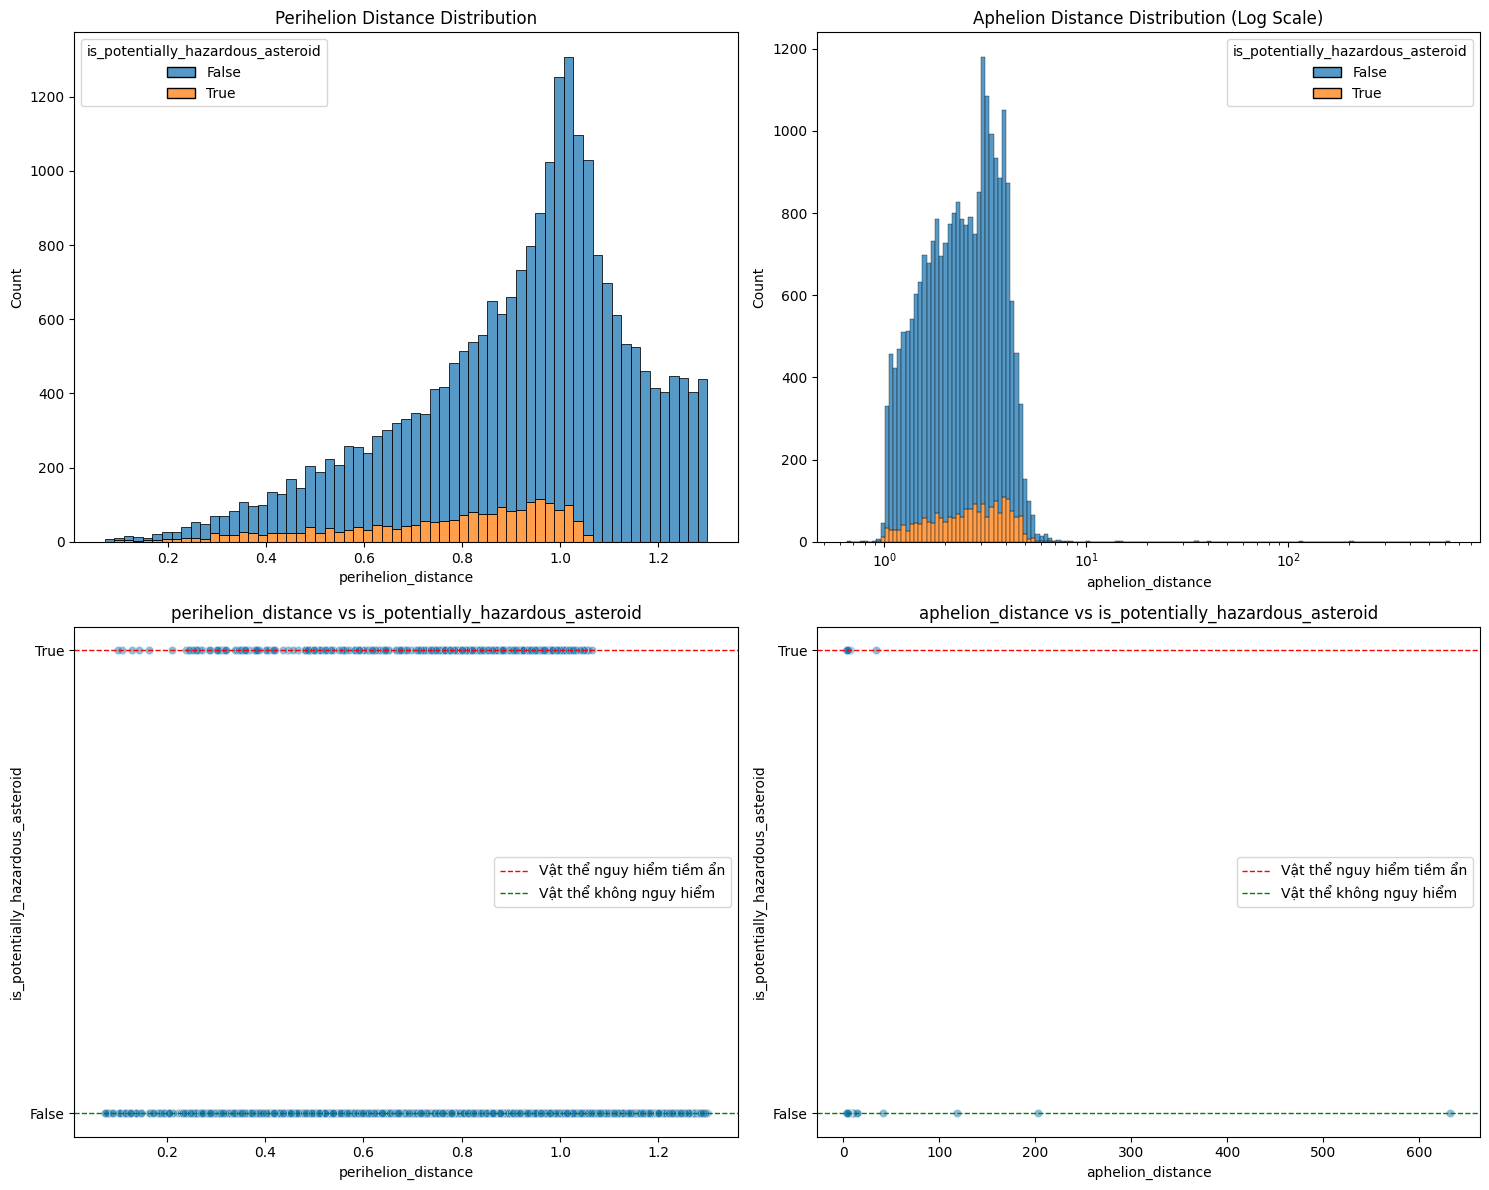

In [57]:
# Tạo subplot với 2x2 biểu đồ để phân tích chi tiết
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Distribution plot cho perihelion
sns.histplot(data=df,
             x='perihelion_distance',
             hue='is_potentially_hazardous_asteroid',
             multiple="stack",
             ax=axes[0,0])
axes[0,0].set_title('Perihelion Distance Distribution')

# 2. Distribution plot cho aphelion với log scale
sns.histplot(data=df,
             x='aphelion_distance',
             hue='is_potentially_hazardous_asteroid',
             multiple="stack",
             log_scale=True,  # Sử dụng log scale cho trục x
             ax=axes[0,1])
axes[0,1].set_title('Aphelion Distance Distribution (Log Scale)')

# 3. Box plot riêng cho từng nhóm aphelion

sns.scatterplot(x='aphelion_distance', 
                y='is_potentially_hazardous_asteroid',
                data=newdf,
                alpha=0.5,
                ax=axes[1,1])

# Add horizontal lines for True/False values
axes[1,1].axhline(y=1, color='r', linestyle='--', label='Vật thể nguy hiểm tiềm ẩn', linewidth=1)
axes[1,1].axhline(y=0, color='g', linestyle='--', label='Vật thể không nguy hiểm', linewidth=1)

# Customize plot
axes[1,1].set_title('aphelion_distance vs is_potentially_hazardous_asteroid')
axes[1,1].set_xlabel('aphelion_distance')
axes[1,1].set_label('is_potentially_hazardous_asteroid')

# Hide y-axis ticks but keep the label
axes[1,1].set_yticks([0, 1], ['False', 'True'])
axes[1,1].legend()

# 4. Plot riêng cho từng nhóm perihelion

sns.scatterplot(x='perihelion_distance', 
                y='is_potentially_hazardous_asteroid',
                data=newdf,
                alpha=0.5,
                ax=axes[1,0])

# Add horizontal lines for True/False values
axes[1,0].axhline(y=1, color='r', linestyle='--', label='Vật thể nguy hiểm tiềm ẩn', linewidth=1)
axes[1,0].axhline(y=0, color='g', linestyle='--', label='Vật thể không nguy hiểm', linewidth=1)

# Customize plot
axes[1,0].set_title('perihelion_distance vs is_potentially_hazardous_asteroid')
axes[1,0].set_xlabel('perihelion_distance')
axes[1,0].set_label('is_potentially_hazardous_asteroid')

# Hide y-axis ticks but keep the label
axes[1,0].set_yticks([0, 1], ['False', 'True'])
axes[1,0].legend()


plt.tight_layout()
plt.show()


In [38]:
# Thống kê phân tích
def categorize_aphelion(value):
    if value <= 2: return '≤2 AU'
    elif value <= 5: return '2-5 AU'
    elif value <= 10: return '5-10 AU'
    else: return '>10 AU'

df['aphelion_category'] = df['aphelion_distance'].apply(categorize_aphelion)

print("\nPhân phối vật thể theo khoảng cách Aphelion:")
print(df['aphelion_category'].value_counts().sort_index())

print("\nTỉ lệ vật thể nguy hiểm theo nhóm Aphelion:")
hazard_ratio = df.groupby('aphelion_category')['is_potentially_hazardous_asteroid'].mean().sort_index()
print(hazard_ratio)


Phân phối vật thể theo khoảng cách Aphelion:
aphelion_category
2-5 AU     15289
5-10 AU      289
>10 AU        10
≤2 AU       8411
Name: count, dtype: int64

Tỉ lệ vật thể nguy hiểm theo nhóm Aphelion:
aphelion_category
2-5 AU     0.093204
5-10 AU    0.128028
>10 AU     0.100000
≤2 AU      0.075021
Name: is_potentially_hazardous_asteroid, dtype: float64


In [32]:
# Phân tích thống kê cho từng nhóm
print("\nThống kê chi tiết cho từng nhóm Aphelion:")
for category in ['≤2 AU', '2-5 AU', '5-10 AU', '>10 AU']:
    group = df[df['aphelion_category'] == category]
    print(f"\nNhóm {category}:")
    print(f"Số lượng vật thể: {len(group)}")
    print(f"Tỉ lệ nguy hiểm: {group['is_potentially_hazardous_asteroid'].mean():.2%}")
    print(f"Perihelion trung bình: {group['perihelion_distance'].mean():.2f}")


Thống kê chi tiết cho từng nhóm Aphelion:

Nhóm ≤2 AU:
Số lượng vật thể: 8411
Tỉ lệ nguy hiểm: 7.50%
Perihelion trung bình: 0.85

Nhóm 2-5 AU:
Số lượng vật thể: 15289
Tỉ lệ nguy hiểm: 9.32%
Perihelion trung bình: 0.95

Nhóm 5-10 AU:
Số lượng vật thể: 289
Tỉ lệ nguy hiểm: 12.80%
Perihelion trung bình: 0.93

Nhóm >10 AU:
Số lượng vật thể: 10
Tỉ lệ nguy hiểm: 10.00%
Perihelion trung bình: 1.07


In [23]:
# Tính tỉ lệ vật thể nguy hiểm theo khoảng cách
def analyze_hazard_ratio(df, column, bins=5):
    df_binned = pd.qcut(df[column], q=bins, duplicates='drop')
    hazard_ratio = df.groupby(df_binned)['is_potentially_hazardous_asteroid'].mean()
    return hazard_ratio

print("\nTỉ lệ vật thể nguy hiểm theo khoảng Perihelion:")
print(analyze_hazard_ratio(df, 'perihelion_distance'))
print("\nTỉ lệ vật thể nguy hiểm theo khoảng Aphelion:")
print(analyze_hazard_ratio(df, 'aphelion_distance'))


Tỉ lệ vật thể nguy hiểm theo khoảng Perihelion:
perihelion_distance
(0.0694, 0.729]    0.160625
(0.729, 0.907]     0.131875
(0.907, 1.007]     0.107522
(1.007, 1.101]     0.036250
(1.101, 1.3]       0.000000
Name: is_potentially_hazardous_asteroid, dtype: float64

Tỉ lệ vật thể nguy hiểm theo khoảng Aphelion:
aphelion_distance
(0.653, 1.573]      0.074167
(1.573, 2.151]      0.075000
(2.151, 2.878]      0.093353
(2.878, 3.606]      0.079375
(3.606, 631.895]    0.114375
Name: is_potentially_hazardous_asteroid, dtype: float64


C:\Users\Dell\AppData\Local\Temp\ipykernel_12048\3379259615.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hazard_ratio = df.groupby(df_binned)['is_potentially_hazardous_asteroid'].mean()
C:\Users\Dell\AppData\Local\Temp\ipykernel_12048\3379259615.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hazard_ratio = df.groupby(df_binned)['is_potentially_hazardous_asteroid'].mean()


In [20]:
# tính tỉ lệ thành công trong aphelion_distance

# thành công
df[df['']]
newdf.count()

KeyError: ''